<h2><b>Introduction/Business Problem</b></h2>

The problem is in what means can the government reduce the severity of car accidents.

Although accidents always happen, I believe measures can be taken to reduce the severity. First, some accdients happen together with driver controllable factors such as speeding  or alocohol taking. If such actions are related to the accident severity, then the study support imposing harsher punishment. On the other hand, some accidenets happens when the road condition is bad. If it is related to the severity, then the government can alert drivers about high risk.

<h2><b>Data</b></h2>

Collisions Data from the Seattle Government is used in the project. Collisions timeframe is 2004 to Present. It contains 37 variables and 194,673 records.

The dependent variable is 'SEVERITYCODE'. Value '1' indicate lower severity 'prop damage', and value '2' higher severity 'injury'.

There are two kinds of independent variables. the first kind is driver controllable factor, including drug / alcohol influence, inattention and speeding. the second kind is driver uncontrollable factors, including weather, road condition and light condition.

<h2><b>Methodology</b></h2>

The dataset independent variables are mostly categorical variables. Therefore exploratory data analysis is used. I look at the probability of the severity under different condition. If the severity probability is significantly different among an independent variable, then there should be a strong correlation between the independent variable and severity level.

<h2><b>Result</b></h2>

<b>Preprocessing</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [117]:
df=pd.read_csv('https://github.com/chaniw12/Coursera_Capstone/blob/master/Data-Collisions.csv?raw=true')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [143]:
df['INATTENTIONIND']=df['INATTENTIONIND'].fillna('N')
df['UNDERINFL']=df['UNDERINFL'].fillna('N')
df['UNDERINFL'].replace({'0':'N','1':'Y'},inplace=True)
df['SPEEDING']=df['SPEEDING'].fillna('N')

df['WEATHER']=df['WEATHER'].fillna('Other')
df['WEATHER'].replace({'Unknown':'Other','Sleet/Hail/Freezing Rain':'Raining','Blowing Sand/Dirt':'Other','Severe Crosswind':'Other','Partly Cloudy':'Other'},inplace=True)

df['ROADCOND']=df['ROADCOND'].fillna('Other')
df['LIGHTCOND']=df['LIGHTCOND'].fillna('Other')
df['LIGHTCOND'].replace({'Dark - Street Lights On':'Dark','Dark - No Street Lights':'Dark','Dark - Street Lights Off':'Dark','Dark - Unknown Lighting':'Dark'},inplace=True)

In [83]:
count_sev_list=df['SEVERITYCODE'].value_counts().to_list()
count_sev_1=count_sev_list[0]
count_sev_2=count_sev_list[1]

In [56]:
severity=df.groupby(['SEVERITYCODE']).size().to_frame().rename(columns={0:'count'})
severity=severity.reset_index()
severity=severity/df.shape[0]

In [95]:
inattention=df.groupby(['SEVERITYCODE', 'INATTENTIONIND']).size().to_frame().rename(columns={0:'count'})
inattention=inattention.reset_index()
inattention['count']=inattention.apply(lambda x: x['count']/count_sev_1 if x['SEVERITYCODE']==1 else x['count']/count_sev_2, axis=1)

In [105]:
drug_alcohol=df.groupby(['SEVERITYCODE', 'UNDERINFL']).size().to_frame().rename(columns={0:'count'})
drug_alcohol=drug_alcohol.reset_index()
drug_alcohol['count']=drug_alcohol.apply(lambda x: x['count']/count_sev_1 if x['SEVERITYCODE']==1 else x['count']/count_sev_2, axis=1)

In [111]:
speeding=df.groupby(['SEVERITYCODE', 'SPEEDING']).size().to_frame().rename(columns={0:'count'})
speeding=speeding.reset_index()
speeding['count']=speeding.apply(lambda x: x['count']/count_sev_1 if x['SEVERITYCODE']==1 else x['count']/count_sev_2, axis=1)

In [129]:
weather=df.groupby(['SEVERITYCODE', 'WEATHER']).size().to_frame().rename(columns={0:'count'})
weather=weather.reset_index()
weather['count']=weather.apply(lambda x: x['count']/count_sev_1 if x['SEVERITYCODE']==1 else x['count']/count_sev_2, axis=1)

In [134]:
roadcon=df.groupby(['SEVERITYCODE', 'ROADCOND']).size().to_frame().rename(columns={0:'count'})
roadcon=roadcon.reset_index()
roadcon['count']=roadcon.apply(lambda x: x['count']/count_sev_1 if x['SEVERITYCODE']==1 else x['count']/count_sev_2, axis=1)

In [146]:
lightcon=df.groupby(['SEVERITYCODE', 'LIGHTCOND']).size().to_frame().rename(columns={0:'count'})
lightcon=lightcon.reset_index()
lightcon['count']=lightcon.apply(lambda x: x['count']/count_sev_1 if x['SEVERITYCODE']==1 else x['count']/count_sev_2, axis=1)

<b>Overall severity</b>

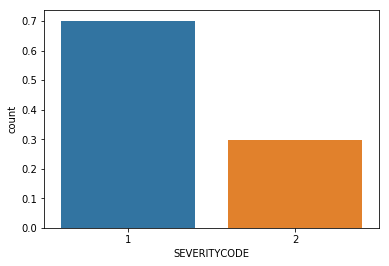

In [57]:
ax = sns.barplot(x='SEVERITYCODE', y='count', data=severity)

<b>Driver Controllable Factors</b>

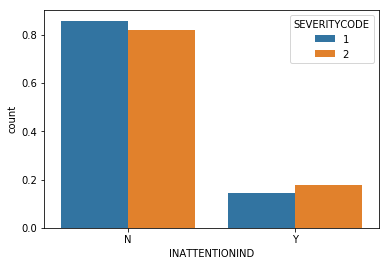

In [99]:
ax = sns.barplot(x='INATTENTIONIND', y='count', hue='SEVERITYCODE', data=inattention)

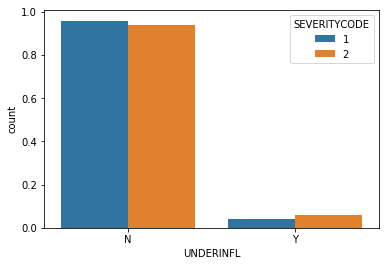

In [107]:
ax = sns.barplot(x='UNDERINFL', y='count', hue='SEVERITYCODE', data=drug_alcohol)

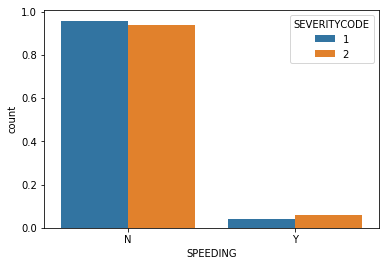

In [112]:
ax = sns.barplot(x='SPEEDING', y='count', hue='SEVERITYCODE', data=speeding)

<b>Uncontrollable Factors</b>

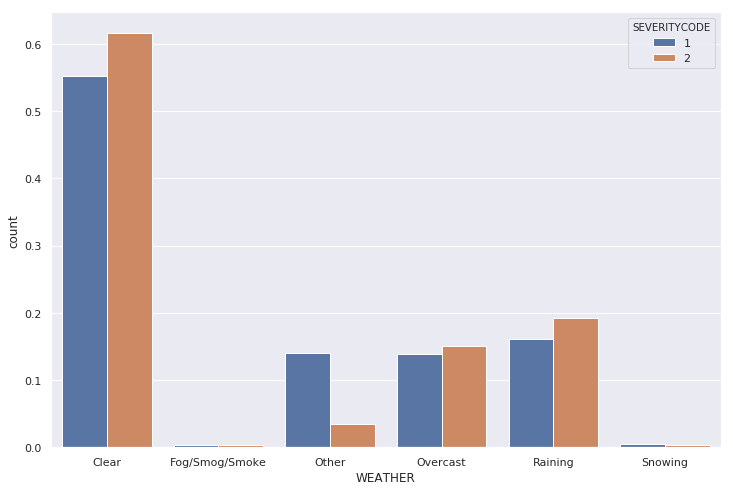

In [130]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x='WEATHER', y='count', hue='SEVERITYCODE', data=weather)

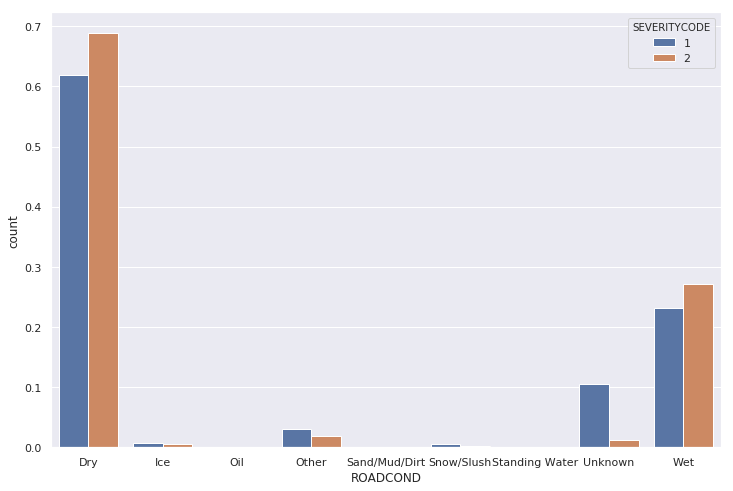

In [135]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x='ROADCOND', y='count', hue='SEVERITYCODE', data=roadcon)

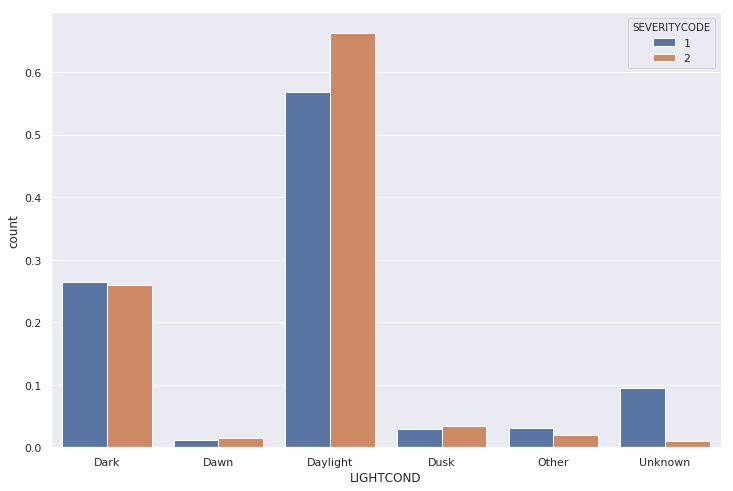

In [147]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x='LIGHTCOND', y='count', hue='SEVERITYCODE', data=lightcon)

<h2><b>Discussion</b></h2>

Severity 1 has a probability of 70%, where as severity 2 30%.

This aligns with our understanding that less severity accidents happen more frequent.

In controllable section we study three factors: inattention, influence by drug / alcohol and speeding.

We found that if these factors present, the severity tends to be higher. However, the tendency is not significant. 

In uncontrollable section we study three factors: weather, road condition and light condition.

Weather and road condition are not correlated to the severity based on data finding. High severity can be observed in both good and bad condition.

Light condition suggest that more severity accidents happen in daylight. This does not align with the common sense that dark environment is risky to driving.

A high portion of missing value / Other / Unknown observations appear in the uncontrollable factors. This may distort the correlation result.

<h2><b>Conclusion</b></h2>

The data shows the correlation between a bunch of factors that may or may not relate to a more severe car accident. We see that poor driving behavior will slightly increase the severity chance. However the relationship is not strong. We do not see change in laws / punishment can effectively reduce car accident severity. But government can still promote careful and responsible driving attitute.

Driving environment does not link with severity, according to data finding. severity is not higher in bad environment. In a extreme scenario, daylight time has a higher probability of more severe accident. Therefore we do not see evidence that alert to weather / road condition can effective reduce severity.